In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import statistics
import numpy as np
from collections import Counter

## Part 1: Preliminary Exercise

#### 1. Read in the gapminder_clean.csv data as a pandas DataFrame

In [14]:
# load the file into a pandas dataframe
df = pd.read_csv('gapminder_clean.csv')
df

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


#### 2. Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data

In [15]:
# filter year by 1962
df_1962 = df[df['Year'] == 1962]
df_1962

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450000,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
10,10,Albania,1962,NaN,1.439956,NaN,NaN,NaN,NaN,6.282000,NaN,NaN,NaN,NaN,64.162854,62.456898,NaN,1728137.0,Europe,2312.888958
20,20,Algeria,1962,NaN,0.484954,NaN,NaN,NaN,19.793873,7.614000,-19.685042,20.818647,NaN,2.351279,47.045000,4.908240,NaN,11000948.0,Africa,2550.816880
30,30,American Samoa,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.590000,NaN,NaN,NaN,NaN
40,40,Andorra,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.714894,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2553,Virgin Islands,1962,NaN,NaN,NaN,NaN,NaN,NaN,5.679000,NaN,NaN,NaN,NaN,64.462561,103.714286,NaN,NaN,NaN,NaN
2567,2567,World,1962,NaN,3.134694,75.777409,NaN,NaN,11.651114,5.030386,5.549853,11.916013,NaN,NaN,53.404890,24.120006,NaN,NaN,NaN,NaN
2577,2577,"Yemen, Rep.",1962,NaN,0.728004,NaN,NaN,NaN,NaN,7.437000,NaN,NaN,NaN,NaN,34.739561,10.112857,NaN,NaN,NaN,NaN
2587,2587,Zambia,1962,NaN,NaN,NaN,NaN,NaN,NaN,7.127000,-2.490840,NaN,NaN,2.091562,45.853659,4.359305,NaN,3421000.0,Africa,1452.725766


We drop NaN rows between gdpPercap and CO2 emissions (metric tons per capita)

In [16]:
df_1962_co2_gdp = df_1962[['CO2 emissions (metric tons per capita)', 'gdpPercap']]
df_1962_co2_gdp = df_1962_co2_gdp.dropna()
df_1962_co2_gdp

,CO2 emissions (metric tons per capita),gdpPercap
0,0.073781,853.100710
10,1.439956,2312.888958
20,0.484954,2550.816880
50,0.216025,4269.276742
80,2.522392,7133.166023
...,...,...
2443,0.059258,767.271740
2473,11.142928,12477.177070
2483,16.013937,16173.145860
2503,1.540657,5603.357717


Once our data is cleaned, we can make a make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap

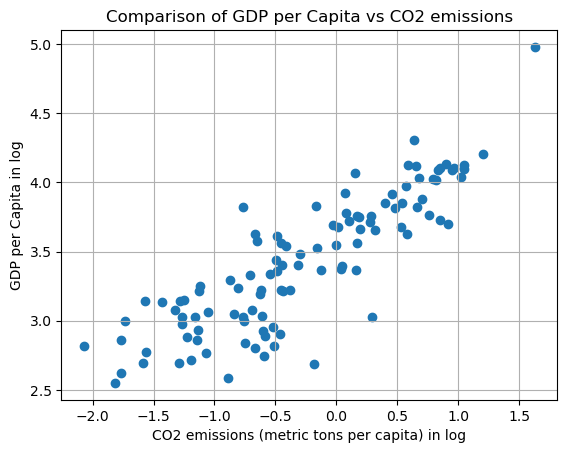

In [17]:
plt.scatter(np.log10(df_1962_co2_gdp['CO2 emissions (metric tons per capita)']), np.log10(df_1962_co2_gdp['gdpPercap']))
plt.ylabel('GDP per Capita in log')
plt.xlabel('CO2 emissions (metric tons per capita) in log')
plt.title('Comparison of GDP per Capita vs CO2 emissions')
plt.grid()
plt.show()

The plot is scaled to logarithmic to make the scatter plot look more compact. As we can see in the plot, there is a linear relationship between GDP and CO2 emissions.

#### 3. On the filtered data, calculate the correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the correlation and associated p value?

In [18]:
corr_1962, p_val = stats.pearsonr(df_1962_co2_gdp['CO2 emissions (metric tons per capita)'], df_1962_co2_gdp['gdpPercap'])
print('Pearson correlation of', corr_1962)
print('P value of', p_val)

Pearson correlation of 0.9260816725019472
P value of 1.1286792210038754e-46


#### 4. On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step

In [19]:
years = list(set(df['Year'].to_list()))

corrs = []
pvals = []
for i in years:
    filtered_by_year = df[df['Year'] == i][['CO2 emissions (metric tons per capita)', 'gdpPercap']].dropna()
    corr, pval = stats.pearsonr(filtered_by_year['CO2 emissions (metric tons per capita)'], filtered_by_year['gdpPercap'])
    corrs.append(corr)
    pvals.append(pval)

df_corr_pval = pd.DataFrame()
df_corr_pval['Years']= years
df_corr_pval['Correlation']= corrs
df_corr_pval['P-value']= pvals

# filter by max correlation in the column
df_corr_pval[df_corr_pval['Correlation'] == max(df_corr_pval['Correlation'])]

,Years,Correlation,P-value
4,1967,0.938792,3.397143e-53


The highest correlation found between CO2 and GDP is in year **1967**.

#### 5. Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.

In [20]:
df_1967 = df[df['Year'] == 1967]
df_1967 = df_1967[['CO2 emissions (metric tons per capita)', 'gdpPercap','continent', 'pop']].dropna()
df_1967

,CO2 emissions (metric tons per capita),gdpPercap,continent,pop
1,0.123782,836.197138,Asia,11537966.0
11,1.363746,2760.196931,Europe,1984060.0
21,0.632118,3246.991771,Africa,12760499.0
51,0.166659,5522.776375,Africa,5247469.0
81,2.858163,8052.953021,Americas,22934225.0
...,...,...,...,...
2484,18.598318,19530.365570,Americas,198712000.0
2504,1.776101,5444.619620,Americas,2748579.0
2544,0.574906,637.123289,Asia,39463910.0
2588,1.263628,1777.077318,Africa,3900000.0


In [21]:
# plot
fig = px.scatter(df_1967, x="CO2 emissions (metric tons per capita)", y="gdpPercap", color='continent', title='Comparison of CO2 emissions (metric tons per capita) and GDP per Capita across Continents' ,size='pop')
fig.show()

## Part 2: Questions

### 1. What is the relationship between continent and 'Energy use (kg of oil equivalent per capita)'? (Stats test needed)

Two variables are being compared here - one is categorical (continents) while the other is continuous (energy use). The predictor variable here is the continent and the outcome is the energy use. Given we are comparing multiple groups with each other, we are inclined to use the one-way ANOVA test. However, we need to ensure that the required parametric assumptions are satisfied in order to correctly use a statistical test. 

We start with cleaning our dataset by dropping the NaN values.

In [10]:
df_continent_energy = df[['continent', 'Energy use (kg of oil equivalent per capita)']]
df_continent_energy = df_continent_energy.dropna() # drop rows with NaN
df_continent_energy

,continent,Energy use (kg of oil equivalent per capita)
12,Europe,865.592481
13,Europe,923.728868
14,Europe,966.683284
15,Europe,921.893044
16,Europe,418.286630
...,...,...
2602,Africa,896.673611
2603,Africa,923.493407
2604,Africa,804.508892
2605,Africa,772.676619


In [11]:
# continents 
continents = list(set(df_continent_energy['continent'].to_list()))

But before we apply a statistical test, we should test for normality and equality of variance.

#### A. Shapiro-Wilk test (normality)

In [19]:
# test for normality - Shapiro-Wilk test

from scipy.stats import shapiro

for x in continents:
    shapiro_test = stats.shapiro(df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']==x])
    print(x, shapiro_test)

Africa ShapiroResult(statistic=0.6747235059738159, pvalue=2.334312218924711e-19)
Europe ShapiroResult(statistic=0.8964674472808838, pvalue=2.9995352989614643e-12)
Americas ShapiroResult(statistic=0.5632227659225464, pvalue=1.5868549264583104e-21)
Asia ShapiroResult(statistic=0.6609911322593689, pvalue=4.943081931118751e-19)
Oceania ShapiroResult(statistic=0.9818098545074463, pvalue=0.9552662372589111)


Since the most groups have a non-normal distribution (p-value less than 0.05), we ought to use a statistical test that is robust against normality assumptions.

#### B. Levene's test (normality)

In [17]:
# test variance - Levene's Test
from scipy.stats import levene

stat, p = levene(
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Africa'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Americas'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Asia'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Europe'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Oceania'])

print(p)

8.003283101567902e-10


With a p-value of less than 0.05, this means the variance across the groups are not equal.

Since we are dealing with non-normal and unequal variance, we should use a non-parametric statistical test, specifically Kruskal -Wallis test which tests the null hypothesis that a median of all groups are equal.

#### C. Kruskal-Wallis Test

In [21]:
# apply Kruskal-Wallis test

kw_test = stats.kruskal(
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Africa'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Americas'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Asia'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Europe'],
    df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Oceania'])

print(kw_test)

KruskalResult(statistic=318.67631745519657, pvalue=1.012403877816158e-67)


As the p-value is lower than 0.05, we reject the null hypothesis for Kruskal-Wallis test which is that the group medians are equal and accept the alternative hypothesis which is at least one group median is statistically different from other groups.

Let's calculate the median of each group.

In [29]:
for x in continents:
    med = statistics.median(df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']==x])
    print(x, med)

Africa 449.52124719
Europe 3027.93179277
Americas 749.0291078995
Asia 760.140852043
Oceania 4044.850674445


Here we see that Oceania has the highest median while Africa has the lowest median Energy use.

#### Distribution Plot of the Energy Use of each Continent

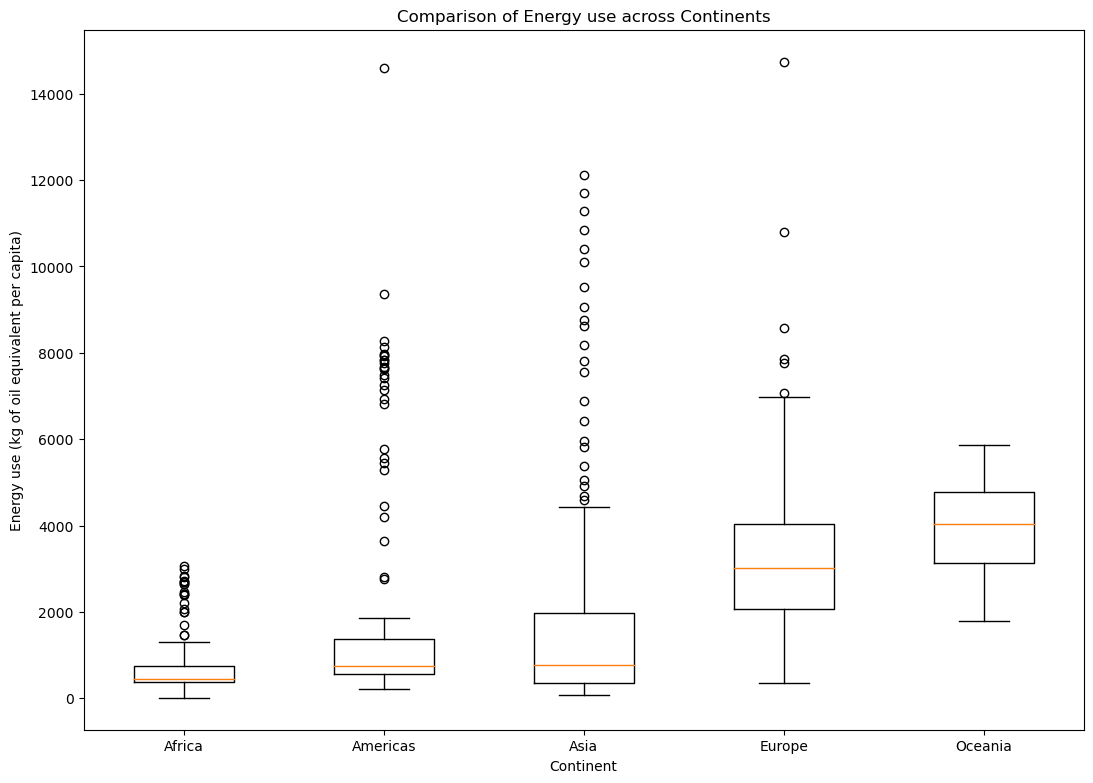

In [27]:
data_1 = df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Africa']
data_2 = df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Americas']
data_3 = df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Asia']
data_4 = df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Europe']
data_5 = df_continent_energy['Energy use (kg of oil equivalent per capita)'][df_continent_energy['continent']=='Oceania']
data = [data_1, data_2, data_3, data_4, data_5]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_xticklabels(['Africa','Americas','Asia','Europe','Oceania'])
plt.ylabel('Energy use (kg of oil equivalent per capita)')
plt.xlabel('Continent')
plt.title('Comparison of Energy use across Continents')
plt.show()

As seen in the box plot above, the continent groups have different distributions, with Oceania having the highest median and Africa having the lowest median Energy Use.

### 2. Is there a significant difference between Europe and Asia with respect to 'Imports of goods and services (% of GDP)' in the years after 1990? (Stats test needed)

We need to perform a statistical test that compares continuous variables fo two groups whether in terms of mean, median, or distribution. Given the type of data, we are inclined to use T-Test. However, we have to confirm our parametric assumptions first.

To start, we extract the dataset by country (Europe and Asia) and year (>1900). 

In [30]:
df_europe = df[(df['Year'] > 1990) & (df['continent'] == 'Europe')][['Year', 'continent', 'Imports of goods and services (% of GDP)']]
df_asia = df[(df['Year'] > 1990) & (df['continent'] == 'Asia')][['Year', 'continent', 'Imports of goods and services (% of GDP)']]

In [33]:
# drop NaN values
df_europe = df_europe.dropna()
df_asia = df_asia.dropna()

Similar to what we did in the previous question, we need to test for normality and equality of variance in order to apply an appropriate statistical test.

#### A. Shapiro-Wilk test (normality)

In [36]:
# test normality of distribution - Shapiro-Wilk test
# if p-value is less than 0.05, then not normal

shapiro_test_europe = stats.shapiro(df_europe['Imports of goods and services (% of GDP)'])
shapiro_test_asia = stats.shapiro(df_asia['Imports of goods and services (% of GDP)'])
print('Europe: ', shapiro_test_europe)
print('Asia: ', shapiro_test_asia)

Europe:  ShapiroResult(statistic=0.929049015045166, pvalue=1.3634329661726952e-05)
Asia:  ShapiroResult(statistic=0.8548967838287354, pvalue=2.3096902168617817e-08)


With p-value less than 0.05, the results show that the two groups are non-normal.

#### B. Levene's Test (Variance)

In [37]:
# test variance - Levene's Test

stat, p = levene(df_europe['Imports of goods and services (% of GDP)'], df_asia['Imports of goods and services (% of GDP)'])
print(p)

0.00018461387781129707


Since the p-value is less than 0.05, the variance between the two groups is unequal.


Instead of T-Test, we must use a non-parametric statistical test that is robust against normality assumptions and unequal variances. The appropriate statistical test for this is the **Mann-Whitney U Test**.

#### C. Mann-Whitney U Test

In [38]:
from scipy.stats import mannwhitneyu

U1, p_mwu = mannwhitneyu(df_europe['Imports of goods and services (% of GDP)'], df_asia['Imports of goods and services (% of GDP)'], alternative='two-sided')
                                                        
print(p_mwu)                                                                                    

0.786701277923471


Since the p-value is greater than 0.05, we accept the null hypothesis that both groups have similar distributions.

#### Distribution Plot of the Imports of goods and Services of Europe and Asia

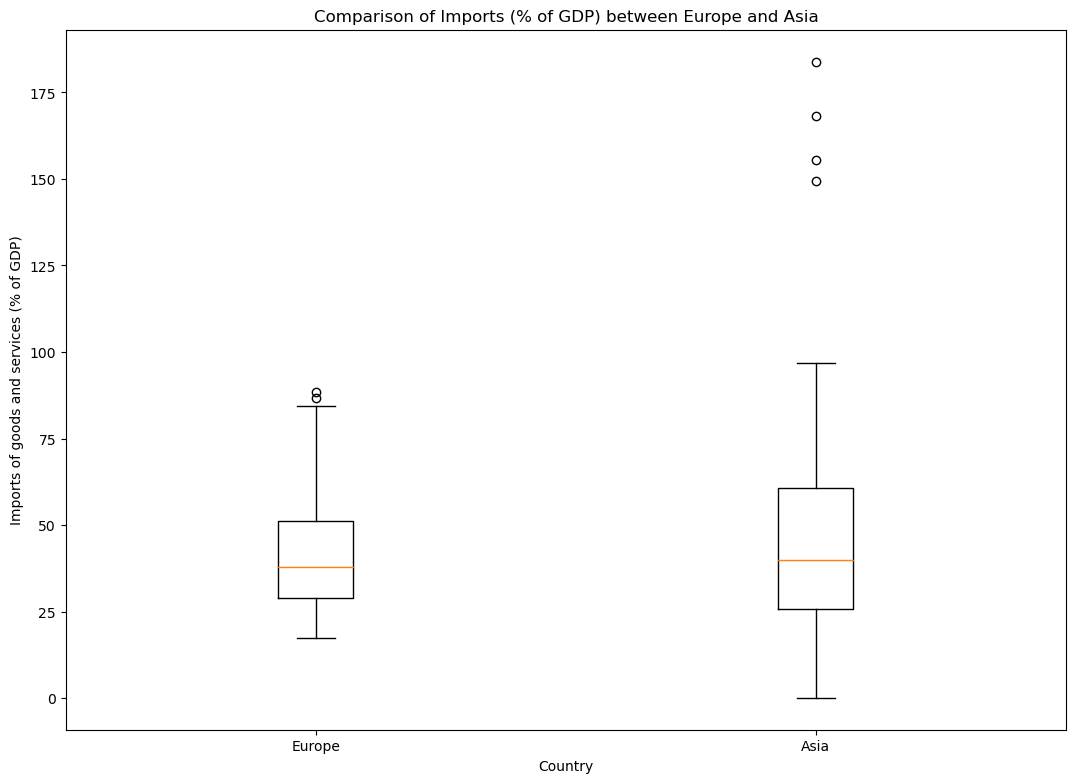

In [40]:
data_1 = df_europe['Imports of goods and services (% of GDP)']
data_2 = df_asia['Imports of goods and services (% of GDP)']
data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
ax.set_xticklabels(['Europe','Asia'])
plt.ylabel('Imports of goods and services (% of GDP)')
plt.xlabel('Country')
plt.title('Comparison of Imports (% of GDP) between Europe and Asia')
plt.show()

As we can observe, the box plots of Europe and Asia are similar in terms of their distribution and their means are almost aligned/equal.

#### 3. What is the country (or countries) that has the highest 'Population density (people per sq. km of land area)' across all years? (i.e., which country has the highest average ranking in this category across each time point in the dataset?)

To start, we the columns for Population density, Year, and Country. Then we get the mean Population Density per year in each country. We do this by grouping the dataset by Country and Year which averages the values with identical Country and Year rows.

In [88]:
df_pop_den = df[['Year','Country Name','Population density (people per sq. km of land area)']].dropna()

# group by Country and Year to get average population density per year
df_pop_den = df_pop_den.groupby(['Country Name','Year']).mean().reset_index()

In [89]:
# count how many unique years there are
years = set(df_pop_den['Year'].to_list())
years

{1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007}

We obtain the highest population density value from each year, then determine the countries that have these values.

In [114]:
# get highest pop density per year
highest_population_density = []
for i in years:
    highest_population_density.append(df_pop_den[df_pop_den['Year'] == i]['Population density (people per sq. km of land area)'].max())

    
# search for countries with these max pop density in each year
highest_countries_per_year = []
for i, x in zip(years, highest_population_density):
    highest_countries_per_year.append(df_pop_den[(df_pop_den['Year'] == i) & (df_pop_den['Population density (people per sq. km of land area)'] == x)]['Country Name'].to_list()[0])

    
Counter(highest_countries_per_year)

Counter({'Macao SAR, China': 5, 'Monaco': 5})

**Monaco** and **Macao, China** have the highest population density across all years. Both countries appeared as many times as the country with highest population density across all years, from 1962 to 2007.

#### 4. What country (or countries) has shown the greatest increase in 'Life expectancy at birth, total (years)' between 1962 and 2007?

To get the countries with greatest increase in Life Expectancy, we should calculate the difference in the life expectancy between 1962 and 2007 in terms of percentage increase. The formula used for percentage increase is as follows:

Percentage Increase % = 100 * (X_2007 - X_1962) / X_1962

Using percentage increase, we are able to see the relative change in life expectancy for a country and take into account how big is the change from the starting point.

In [132]:
countries = set(df['Country Name'].to_list())

In [133]:
# extract country, year, and life expectancy
df_1962 = df[df['Year'] == 1962][['Year','Country Name','Life expectancy at birth, total (years)']].dropna()
df_2007 = df[df['Year'] == 2007][['Year','Country Name','Life expectancy at birth, total (years)']].dropna()

# average the life expectancy by country in 1962 and 2007
df_mean_1962 = df_1962.groupby('Country Name').mean().reset_index()
df_mean_2007 = df_2007.groupby('Country Name').mean().reset_index()

In [134]:
df_mean_1962

,Country Name,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,1962.0,33.219902
1,Albania,1962.0,64.162854
2,Algeria,1962.0,47.045000
3,Angola,1962.0,33.787585
4,Antigua and Barbuda,1962.0,62.598537
...,...,...,...
231,Virgin Islands,1962.0,64.462561
232,World,1962.0,53.404890
233,"Yemen, Rep.",1962.0,34.739561
234,Zambia,1962.0,45.853659


In [135]:
df_mean_2007

,Country Name,Year,"Life expectancy at birth, total (years)"
0,Afghanistan,2007.0,57.833829
1,Albania,2007.0,76.470293
2,Algeria,2007.0,72.898366
3,Angola,2007.0,49.435732
4,Antigua and Barbuda,2007.0,74.803220
...,...,...,...
243,West Bank and Gaza,2007.0,71.747049
244,World,2007.0,69.641854
245,"Yemen, Rep.",2007.0,61.954805
246,Zambia,2007.0,52.477146


In [136]:
# Merge two datasets by common Country Name
df_merged = pd.merge(df_mean_2007, df_mean_1962, on="Country Name", how="left")
df_merged = df_merged.dropna()
df_merged

,Country Name,Year_x,"Life expectancy at birth, total (years)_x",Year_y,"Life expectancy at birth, total (years)_y"
0,Afghanistan,2007.0,57.833829,1962.0,33.219902
1,Albania,2007.0,76.470293,1962.0,64.162854
2,Algeria,2007.0,72.898366,1962.0,47.045000
3,Angola,2007.0,49.435732,1962.0,33.787585
4,Antigua and Barbuda,2007.0,74.803220,1962.0,62.598537
...,...,...,...,...,...
242,Virgin Islands,2007.0,78.824390,1962.0,64.462561
244,World,2007.0,69.641854,1962.0,53.404890
245,"Yemen, Rep.",2007.0,61.954805,1962.0,34.739561
246,Zambia,2007.0,52.477146,1962.0,45.853659


There are only 236 countries with both 1962 and 2007 data. We get the percentage increase in Imports of goods and services (% of GDP) between 1962 and 2007.

In [137]:
# in terms of percentage - 2007 - 1962 / 1962
df_merged['Percentage Increase %'] = 100 * ((df_merged['Life expectancy at birth, total (years)_x'] - df_merged['Life expectancy at birth, total (years)_y']) / df_merged['Life expectancy at birth, total (years)_x'])


In [138]:
# sort by highest percentage increase
df_merged.sort_values('Percentage Increase %', ascending=False)

,Country Name,Year_x,"Life expectancy at birth, total (years)_x",Year_y,"Life expectancy at birth, total (years)_y",Percentage Increase %
21,Bhutan,2007.0,66.293098,1962.0,33.094146,50.079047
142,Maldives,2007.0,75.399707,1962.0,38.483561,48.960596
143,Mali,2007.0,54.261927,1962.0,28.548463,47.387671
224,Timor-Leste,2007.0,65.824195,1962.0,34.739049,47.224499
160,Nepal,2007.0,66.551927,1962.0,35.952293,45.978585
...,...,...,...,...,...,...
16,Belarus,2007.0,70.203415,1962.0,68.635829,2.232919
186,Russian Federation,2007.0,67.497561,1962.0,67.021415,0.705427
232,Ukraine,2007.0,68.222195,1962.0,69.146098,-1.354255
128,Lesotho,2007.0,44.882220,1962.0,47.402244,-5.614750


Based on percentage increase in Life Expectancy between 1962 and 2007, **Bhutan** showed the greatest increase, followed by Maldives, Mali, then Timor-Leste.